<a href="https://colab.research.google.com/github/mava123-0/Machine-Learning-Projects/blob/main/Deep%20Learning/Convolutional%20Neural%20Network/MNIST/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()
x_train.shape

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(0.5, 0, '0')

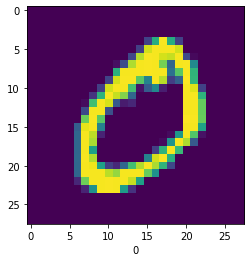

In [ ]:
plt.imshow(x_train[1])
plt.xlabel(y_train[1])

# **Normalize Data**

In [ ]:
x_train = x_train/255
x_test = x_test/255

# **Model Creation**

In [ ]:
cnn = models.Sequential([
        layers.Conv2D(filters = 28, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
        layers.MaxPooling2D((2,2)),
     
        layers.Conv2D(filters = 28, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64,activation = 'relu'),
        layers.Dense(10,activation = 'softmax')   
])

In [ ]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']) 

In [ ]:
 cnn.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0507 - accuracy: 0.9844
Epoch 2/3
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0358 - accuracy: 0.9891
Epoch 3/3
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0283 - accuracy: 0.9910


In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0356 - accuracy: 0.9894


[0.03563423082232475, 0.9894000291824341]

# **Predicting Using Model**

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[::5]

313/313 [==============================] - 3s 10ms/step


array([[1.99275746e-07, 1.07358176e-07, 4.81169172e-06, ...,
        9.99938190e-01, 2.38201210e-08, 2.76416984e-07],
       [8.57928484e-08, 9.99980509e-01, 1.86215161e-07, ...,
        6.17433716e-06, 4.20769993e-07, 1.23061170e-06],
       [9.99726176e-01, 1.64763911e-10, 8.52479025e-06, ...,
        1.95965377e-09, 4.01548334e-07, 2.63655878e-04],
       ...,
       [4.50731221e-08, 4.94241540e-05, 9.99666452e-01, ...,
        1.65211259e-05, 3.64819613e-07, 5.31839248e-08],
       [8.30860500e-08, 1.55720700e-05, 7.12027395e-06, ...,
        9.99827862e-01, 7.92472434e-08, 1.18850517e-06],
       [5.30365840e-09, 8.00488397e-06, 9.99984443e-01, ...,
        6.61631645e-07, 4.44680950e-08, 6.66340871e-11]], dtype=float32)

In [ ]:
def plot_sample(x,y,img_no):
  plt.figure(figsize = (10,2))
  plt.imshow(x[img_no])
  plt.xlabel(y[img_no])

Predictions

Acutal: 7 Predicted: 7
Acutal: 2 Predicted: 2
Acutal: 1 Predicted: 1
Acutal: 0 Predicted: 0
Acutal: 4 Predicted: 4


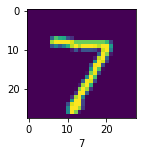

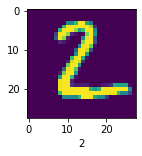

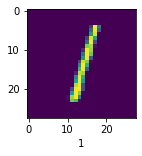

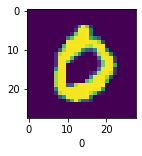

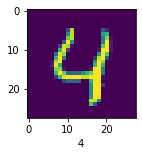

In [ ]:
print("Predictions\n")
for img_no in range(5):
  plot_sample(x_test,y_test,img_no)
  max_index = np.argmax(y_pred[img_no])
  print("Acutal:",y_test[img_no],"Predicted:",max_index)